<h1 style="color:blue;"> Titanic - Machine Learning from Disaster</h1>

<p style="color:brown;">In this exercise we will be participating in the Kaggle competition "Titanic - Machine Learning from Disaster". We will be implementing concepts in this notebook we have been learning in the lessons. This problem involves predicting whether a passenger will survive or not based on different features or attributes.</p>

In [40]:
#Importing the libraries
import pandas as pd
from IPython.display import display
from IPython.display import HTML
import base64 
import pandas_profiling
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from IPython.display import FileLink, FileLinks
import matplotlib.pyplot as plt
import copy
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [41]:
train_df = pd.read_csv("/usr/local/notebooks/datasets/Classification_Competition/train.csv")

display(train_df.head()) # displaying the training dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<h1 style="color:blue;">Exploratory Data Analysis</h1>

In [42]:
# We are using Pandas Profiling for speeding up the process. 
report = pandas_profiling.ProfileReport(train_df)
# Let's now visualize the report generated by pandas_profiling.
display(report)

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h1 style="color:blue;">Interpretation of Pandas Profiling</h1>

<p style="color:brown;">If we carefully analyze the above pandas profiling report we get to the following conclusions.</p>

<ol style="color:brown;">
<li>We have 12 columns or variables present in the dataset, which are described as below.</li>
    
<table>
<tbody>
<tr><th><b>Variable</b></th><th><b>Definition</b></th><th><b>Key</b></th></tr>
<tr>
<td>survival</td>
<td>Survival</td>
<td>0 = No, 1 = Yes</td>
</tr>
<tr>
<td>pclass</td>
<td>Ticket class</td>
<td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
</tr>
<tr>
<td>sex</td>
<td>Sex</td>
<td></td>
</tr>
<tr>
<td>Age</td>
<td>Age in years</td>
<td></td>
</tr>
<tr>
<td>sibsp</td>
<td># of siblings / spouses aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>parch</td>
<td># of parents / children aboard the Titanic</td>
<td></td>
</tr>
<tr>
<td>ticket</td>
<td>Ticket number</td>
<td></td>
</tr>
<tr>
<td>fare</td>
<td>Passenger fare</td>
<td></td>
</tr>
<tr>
<td>cabin</td>
<td>Cabin number</td>
<td></td>
</tr>
<tr>
<td>embarked</td>
<td>Port of Embarkation</td>
<td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
</tr>
</tbody>
</table>

<li>There are 891 rows.</li>
<li>If we go to the warnings tab of above pandas profile report we can see the cardinality of each column.</li>
<li>We have unique values in all the rows of the columns PassengerId and Name.</li>
<li>We have missing values in the following three columns.</li>
<ul>
<li>Age</li>
<li>Cabin</li>
<li>Embarked</li>
</ul>
<li>Survived is the target column which contains the information whether the passenger survived or not. 0 indicates that the passenger did not survived and 1 indicates that the passenger survived. We can see from the pandas profile report above that the rows in the training dataset for the passengers who survived are 342 and that the passengers who did not survived are 549 out of 891 rows.</li>
<li>We can see that the PClass column contains 55.1% people belonging to class 3, 24.2% people belonging to class 1 and 20.7% people belonging to class 2.</li>
<li>Dataset contains 64.8% males and 35.2% females.</li>
<li>The oldest passenger in this dataset is 80 years as visible from the Histogram of Age column.</li>
<li>Parch column suggests us that 76.1% of the passengers do not have parents or children aboard the titanic. </li>
<li>SibSp column suggests us that 68.2% of the passengers do not have spouses or siblings aboard the titanic.</li>
<li>The Fare column is highly skewed.</li>
<li>When we carefully analyze the Embarked column we come to know 72.4% of the passengers embarked on Southampton port, 18.9% of the passengers embarked on Cherbourg port and 8.7% of the passengers embarked on Queenstown port.</li>
<li>We can see from the interactions as the age increase the passengers seem to have less siblings or spouses.</li>
<li>People around age of 40 years seem to pay higher fare.</li>
<li>Fare column seems to be correlated with Survival column.</li>
</ol>

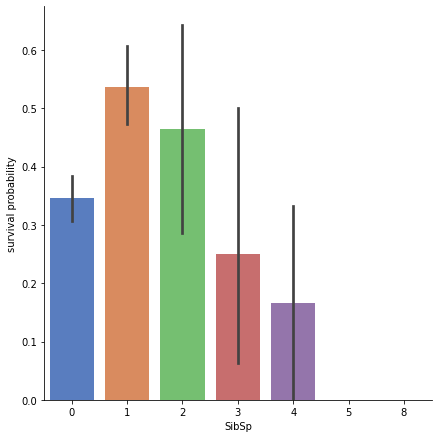

In [43]:
# Explore SibSp feature vs Survived
g = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 6 ,  palette = "muted")
g = g.set_ylabels("survival probability")

<p style="color:brown;">The plot shows that the passengers having a lot of siblings/spouses have less chance to survive. While those people having less siblings/spouses have more chance to survive.</p>


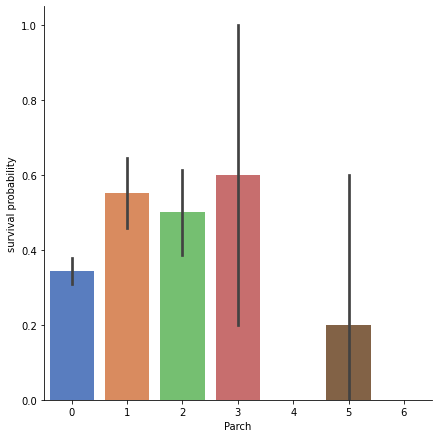

In [44]:
# Explore Parch feature vs Survived
g  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 6 ,palette = "muted")
g = g.set_ylabels("survival probability")

<p style="color:brown;">Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).</p>

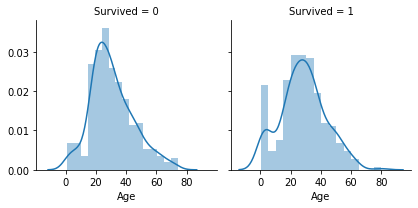

In [45]:
# Explore Age vs Survived
g = sns.FacetGrid(train_df, col='Survived')
g = g.map(sns.distplot, "Age")

<p style="color:brown;">The plot shows us that more young passengers have more chance to survive.</p>

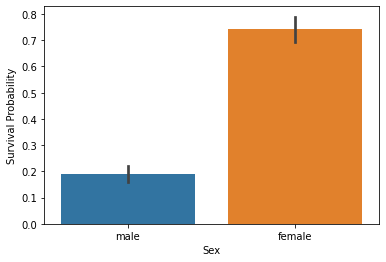

In [46]:
g = sns.barplot(x="Sex",y="Survived",data=train_df)
g = g.set_ylabel("Survival Probability")

<p style="color:brown;">It is visible from the plot that the females have more chance to survive than males. This column can play an important role in the prediction of survival column.</p>

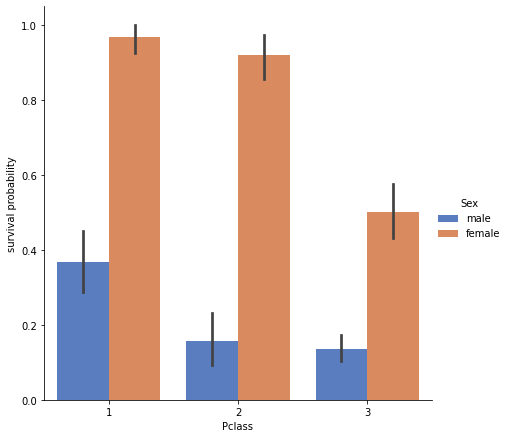

In [47]:
# Explore Pclass vs Survived by Sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df, size=6, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

<p style="color:brown;">It is clear from the plot that people belonging to First class have more chance to survival than other classes.</p>

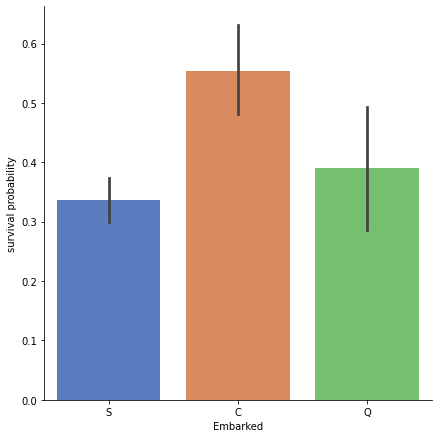

In [48]:
# Explore Embarked vs Survived 
g = sns.factorplot(x="Embarked", y="Survived",  data=train_df, size=6, kind="bar", palette="muted")
g = g.set_ylabels("survival probability")

<p style="color:brown;">Passengers coming from Cherbourg (C) port have more chance of survival.</p>

<h1 style="color:blue;">Dealing with Missing Values</h1>

In [49]:
test_df = pd.read_csv("/usr/local/notebooks/datasets/Classification_Competition/test.csv")

IDtest = test_df["PassengerId"]
dataset =  pd.concat(objs=[train_df, test_df], axis=0).reset_index(drop=True) # Joining the training and the test dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
# Checking for missing values in the entire dataset and then dealing with the missing values
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<p style="color:brown;">So we can see that we have missing values present in the columns of Age, Cabin, Fare and Embarked column. Cabin column has over 1000 missing values so we won't be using it for modelling and dropping it. For the columns of Fare, Embarked and Age we will be doing the imputation. Note that the Survived column contains 418 missing values and they are of the test dataset. Training dataset contains all the values present for Survived column as evident from the above pandas profile.</p>

In [51]:
dataset = dataset.drop(["Cabin"], axis=1)
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median()) # Doing the median imputation for the Fare column
dataset["Embarked"] = dataset["Embarked"].fillna("S") # Doing the mode imputation for the Embarked column

<p style="color:brown;">Age column also contains 263 missing values. But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age. So we have to impute the missing values in the age column with some other method. We can check the title of the person with missing age and impute the missing age with the median value for all other passengers with the same title. We will be using regular expression to extract the title from the Name of the passenger.</p>

In [52]:
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=True) # Using regular expression to extract the title
dataset['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Jonkheer      1
Don           1
Mme           1
Sir           1
Countess      1
Dona          1
Capt          1
Name: Title, dtype: int64

In [53]:
# replace rare titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
dataset.replace({'Title': mapping}, inplace=True)

In [54]:
# confirm that we are left with just six values
dataset['Title'].value_counts()

Mr        767
Miss      264
Mrs       201
Master     61
Dr          8
Rev         8
Name: Title, dtype: int64

In [55]:
# impute missing Age values using median of Title groups
title_ages = dict(dataset.groupby('Title')['Age'].median())

# create a column of the average ages
dataset['age_med'] = dataset['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
dataset['Age'].fillna(dataset['age_med'], inplace=True, )
del dataset['age_med']

In [56]:
dataset.isna().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

<p style="color:brown;">Now we can see that there are no missing values present in the dataset.</p>

<h1 style="color:blue;">Feature Engineering</h1>

In [57]:
dataset.drop(["PassengerId", "Name"], inplace=True, axis=1)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,0.0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,1.0,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,1.0,1,female,35.0,1,0,113803,53.1000,S,Mrs
4,0.0,3,male,35.0,0,0,373450,8.0500,S,Mr


In [58]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1}) # Mapping the values to 0 and 1 for modelling
dataset["Family_Size"] = dataset["SibSp"] + dataset["Parch"] + 1 # Number of people in a family including the person himself
dataset = pd.get_dummies(dataset, columns = ["Title"]) # One hot encoding the Title column
dataset = pd.get_dummies(dataset, columns = ["Embarked"], prefix="Em") # One hot encoding the Embarked column
dataset["Pclass"] = dataset["Pclass"].astype("category") # Converting the PClass into category type
dataset = pd.get_dummies(dataset, columns = ["Pclass"],prefix="Pc") # One hot encoding the Pclass column
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0) # Doing the log transformation on the skewed Fare column

In [59]:
## Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 
Ticket = []
for i in list(dataset.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
dataset["Ticket"] = Ticket
dataset = pd.get_dummies(dataset, columns = ["Ticket"], prefix="T")
dataset.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Family_Size,Title_Dr,Title_Master,Title_Miss,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X
0,0.0,0,22.0,1,0,1.981001,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,38.0,1,0,4.266662,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1,26.0,0,0,2.070022,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1.0,1,35.0,1,0,3.972177,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,0,35.0,0,0,2.085672,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<h1 style="color:blue;">Modelling</h1>

In [60]:
# Separate the dataset into training and testing dataset
train_len = len(train_df)
training_dataset = dataset[:train_len]

In [61]:
# Separate into testing dataset
testing_dataset = dataset[train_len:]
testing_dataset.drop(labels=["Survived"],axis = 1,inplace=True)

In [62]:
# Splitting the training dataset into datasets for training and testing the model
training_dataset["Survived"] = training_dataset["Survived"].astype(int)
X_train, X_test = train_test_split(training_dataset,test_size=0.3,random_state=0,stratify=training_dataset['Survived'])
y_train = X_train[["Survived"]]
y_test = X_test[["Survived"]]

In [63]:
# Support Vector Machine
model_svm=SVC(kernel='rbf',C=1,gamma=0.1)
model_svm.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction1=model_svm.predict(X_test.drop(["Survived"], axis=1))
print('Accuracy for rbf SVM is ', accuracy_score(prediction1,y_test))

Accuracy for rbf SVM is  0.8208955223880597


In [64]:
# Logistic Regression
model_lg = LogisticRegression(solver='liblinear')
model_lg.fit(X_train.drop(["Survived"], axis=1), y_train)
prediction3=model_lg.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the Logistic Regression is',accuracy_score(prediction3,y_test))

The accuracy of the Logistic Regression is 0.835820895522388


In [65]:
# Decision Tree Classifier
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction4=model_dt.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the Decision Tree is', accuracy_score(prediction4,y_test))

The accuracy of the Decision Tree is 0.7910447761194029


In [66]:
# K Nearest Neighbours Classifier
model_knn=KNeighborsClassifier() 
model_knn.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction5=model_knn.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the KNN is', accuracy_score(prediction5,y_test))

The accuracy of the KNN is 0.7873134328358209


In [67]:
# Gaussian Naive Bayes Classifier
model_gn=GaussianNB()
model_gn.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction6=model_gn.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the NaiveBayes is', accuracy_score(prediction6,y_test))

The accuracy of the NaiveBayes is 0.4552238805970149


In [68]:
# Random Forest Classifier
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train.drop(["Survived"], axis=1),y_train)
prediction7=model_rf.predict(X_test.drop(["Survived"], axis=1))
print('The accuracy of the Random Forests is', accuracy_score(prediction7,y_test))

The accuracy of the Random Forests is 0.8134328358208955


<h1 style="color:blue;">Cross Validation</h1>
<p style="color:brown;">We studied the concept of Cross Validation in detail in the lessons. Now we will be applying it on the  given problem to get a generalized model.</p>



In [70]:
kfold = KFold(n_splits=10, shuffle=True, random_state=22) # k=10, split the data into 10 equal parts
mean_of_cross_validation=list()
accuracy=list()

std_of_cross_validation=list()
classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

models=[SVC(kernel='rbf'),LogisticRegression(solver="liblinear"),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]

for i in tqdm(models):
    model = i
    cv_result = cross_val_score(model, training_dataset.drop(["Survived"], axis=1), training_dataset[["Survived"]], cv = kfold, scoring = "accuracy")
    mean_of_cross_validation.append(cv_result.mean())
    std_of_cross_validation.append(cv_result.std())
    accuracy.append(copy.deepcopy(cv_result))
new_models_dataframe=pd.DataFrame({'CV Mean':mean_of_cross_validation,'Std':std_of_cross_validation},index=classifiers)       
new_models_dataframe

100%|██████████| 6/6 [00:02<00:00,  2.13it/s]


,CV Mean,Std
Radial Svm,0.704794,0.054514
Logistic Regression,0.823845,0.043260
KNN,0.780050,0.028265
Decision Tree,0.783483,0.046267
Naive Bayes,0.445618,0.038137
Random Forest,0.813758,0.042313


In [ ]:
new_models_dataframe['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

<h1 style="color:blue;">Confusion Matrix</h1>

In [ ]:
X = training_dataset.drop(["Survived"], axis=1)
Y = training_dataset[["Survived"]]

f,ax=plt.subplots(3,2,figsize=(12,10))

y_pred = cross_val_predict(SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(solver="liblinear"),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,1],annot=True,fmt='2.0f')
ax[2,1].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

<h1 style="color:blue;">Conclusion</h1>

<ul style="color:brown;">
<li>The accuracy of Support Vector Machine, Logistic Regression and Random Forest comes out to be great on the test dataset.</li>
<li>The cross validation mean for the training dataset comes out to be great for Logistic Regression and Random Forest followed by KNN and Decision Tree.</li>
<li>By looking at all the matrices, we can say that rbf-SVM has a higher chance in correctly predicting dead passengers but NaiveBayes has a higher chance in correctly predicting passengers who survived.</li>
</ul>

<h1 style="color:blue;">Hyper-parameter Optimization</h1>

<p style="color:brown;">We will be doing hyper-parameter optimization for the Support Vector Machine and Random Forest which are showing good performance on the training dataset. We will be using GridSearchCV from Scikit Learn for the model hyper-parameter optimization.</p>

In [33]:
# Possible Hyper-Parameter values for Support Vector Machines
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1200 out of 1200 | elapsed:  1.5min finished


0.8282593685267716
SVC(C=1, gamma=0.1, kernel='linear')


In [34]:
# Possible Hyperparameters for Random Forest
n_estimators=range(100,1000,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   34.9s finished


0.8159500345238844
RandomForestClassifier(n_estimators=800, random_state=0)


<p style="color:brown;">The best model for Support Vector Machines is having the accuracy 82% with C=1, gamma=0.1 and kernel="linear".</p>
<p style="color:brown;">The best model for Random Forest is having the accuracy 81% with n_estimators=800.</p>


<h1 style="color:blue;">Submission on Kaggle Competition</h1>

<p style="color:brown;">Now we will be predicting on the test dataset provided at the Kaggle competition. And doing the submission to the competition. We will be using Support Vector Machine, Logistic Regression and Random Forest models to do submission on the Kaggle competition.</p>

In [35]:
svm_predictions = model_svm.predict(testing_dataset) # Support Vector Machine
logistic_regression_predictions = model_lg.predict(testing_dataset) # Logistic Regression
random_forest_predictions = model_rf.predict(testing_dataset) # Random Forest

svm_submission = pd.DataFrame(
    {'PassengerId': IDtest,
     'Survived': svm_predictions
    })

lg_submission = pd.DataFrame(
    {'PassengerId': IDtest,
     'Survived': logistic_regression_predictions
    })
rf_submission = pd.DataFrame(
    {'PassengerId': IDtest,
     'Survived': random_forest_predictions
    })


In [36]:
# Function to create the Download link to the Submissions
def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

In [37]:
create_download_link(svm_submission, title="Download Support Vector Machine Submission", filename="svm_submission.csv")

In [38]:
create_download_link(lg_submission, title="Download Logistic Regression Submission", filename="lg_submission.csv")

In [39]:
create_download_link(rf_submission, title="Download Random Forest Submission", filename="rf_submission.csv")

<p style="color:brown;">
Submission of above files on Kaggle gave us the following results on Public Leaderboard.[Submission Link](https://www.kaggle.com/c/titanic/submit)

<ul style="color:brown;">
<li>Random Forest Regression (0.75837)</li>
<li>Logistic Regression (0.76076)</li>
<li>Support Vector Regression (0.73205)</li>
</ul>

</p>

<h1 style="color:blue;">Conclusion</h1>

<p style="color:brown;">We can see that the logistic regression is performing well on the public leaderboard.</p>